# 카페24, 지그재그 데이터를 합쳐서 분기별로 DBSCAN

### 1. 데이터 전처리 및 합치기
- 지그재그 데이터에서 상품명, 구매자명ID추출
- 카페24 데이터에서 주문상품명(상품명으로 변환), 주문자명, 주문자ID합친 데이터 남겨놓음
- 그중에서 최우수최우수 파일을 통해 최우수최우수인 유저들만 추출해서 합침

### 2. DBSCAN 시행
- 합친 데이터를 바탕으로 DBSCAN시행해서 결과를 봄

### 3. 카테고리, 자사유무항목 추가한 다음 DBSCAN 시행

In [153]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns

In [154]:
#지그재그 1분기 데이터 불러오기
zigzag1=pd.read_excel('지그재그 데이터 분할.xlsx',sheet_name='Sheet1')
zigzag1.head()

,주문일시,상품명,구매자명ID,유입경로
0,2020-07-28 00:01:25,[La belle rose]마린 브이 여름니트,김지애wldo****,지그재그앱
1,2020-07-28 00:01:25,[La belle rose]마린 브이 여름니트,김지애wldo****,지그재그앱
2,2020-07-28 00:03:14,[La belle rose]프롬 퍼프원피스,최혜리hyer****,지그재그앱
3,2020-07-28 00:03:14,[La belle rose]프롬 퍼프원피스,최혜리hyer****,지그재그앱
4,2020-07-28 00:12:32,구미 버튼린넨티,박효진gywl****,지그재그앱


In [155]:
# 상품명, 구매자명iD만 가져오기
zigzag1=zigzag1[['상품명','구매자명ID']]
zigzag1.head()

,상품명,구매자명ID
0,[La belle rose]마린 브이 여름니트,김지애wldo****
1,[La belle rose]마린 브이 여름니트,김지애wldo****
2,[La belle rose]프롬 퍼프원피스,최혜리hyer****
3,[La belle rose]프롬 퍼프원피스,최혜리hyer****
4,구미 버튼린넨티,박효진gywl****


In [156]:
zigzag1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69366 entries, 0 to 69365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     69366 non-null  object
 1   구매자명ID  69366 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [157]:
# 지그재그 2분기 데이터 출력
zigzag2=pd.read_excel('지그재그 데이터 분할.xlsx',sheet_name='Sheet2')
zigzag2.head()

,주문일시,상품명,구매자명ID,유입경로
0,2021-01-29 00:03:18,[La belle rose]하이어 베이직 유넥티,심예지yeji****,지그재그앱
1,2021-01-29 00:03:18,이태리 와이드 핀턱슬랙스,심예지yeji****,지그재그앱
2,2021-01-29 00:03:18,캠빗 세미 부츠컷팬츠,심예지yeji****,지그재그앱
3,2021-01-29 00:03:18,[La belle rose]하이어 베이직 유넥티,심예지yeji****,지그재그앱
4,2021-01-29 00:03:18,이태리 와이드 핀턱슬랙스,심예지yeji****,지그재그앱


In [158]:
# 상품명, 구매자명iD만 가져오기
zigzag2=zigzag2[['상품명','구매자명ID']]
zigzag2.head()

,상품명,구매자명ID
0,[La belle rose]하이어 베이직 유넥티,심예지yeji****
1,이태리 와이드 핀턱슬랙스,심예지yeji****
2,캠빗 세미 부츠컷팬츠,심예지yeji****
3,[La belle rose]하이어 베이직 유넥티,심예지yeji****
4,이태리 와이드 핀턱슬랙스,심예지yeji****


In [159]:
zigzag2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110218 entries, 0 to 110217
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   상품명     110218 non-null  object
 1   구매자명ID  110218 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


In [160]:
cafe1=pd.read_csv('카페24 1분기.csv')
cafe1.head()

,매출경로,메인카테고리 이름,상품옵션,주문상품명,주문일시,주문자 휴대전화,주문자ID,주문자명,총 결제금액,구매자명ID
0,네이버 페이,메인화면,color=크림,본트 롱원피스(스트랩set),2020-07-28 0:01,010-9250-7901,NaN,이지혜,30000,이지혜
1,모바일웹,TOP,color=핑크,젤르 린넨 라운드가디건,2020-07-28 0:03,NaN,1430615835@k,NaN,71400,1430615835@k
2,모바일웹,SALE~50%,color=아이보리,[La belle rose]데일리 여리핏 슬림유넥티,2020-07-28 0:03,NaN,1430615835@k,NaN,71400,1430615835@k
3,모바일웹,메인화면,color=스카이블루,워터 체크 롱스커트,2020-07-28 0:03,NaN,1430615835@k,NaN,71400,1430615835@k
4,모바일웹,TOP,color=아이보리,후노 크롭티셔츠,2020-07-28 0:03,NaN,1430615835@k,NaN,71400,1430615835@k


In [161]:
cafe1=cafe1[['주문상품명','구매자명ID']]
cafe1.head()

,주문상품명,구매자명ID
0,본트 롱원피스(스트랩set),이지혜
1,젤르 린넨 라운드가디건,1430615835@k
2,[La belle rose]데일리 여리핏 슬림유넥티,1430615835@k
3,워터 체크 롱스커트,1430615835@k
4,후노 크롭티셔츠,1430615835@k


In [162]:
cafe1.rename(columns={'주문상품명':'상품명'},inplace=True)

In [163]:
cafe2=pd.read_csv('카페24 2분기.csv')
cafe2.head()

,매출경로,메인카테고리 이름,상품옵션,주문상품명,주문일시,주문자 휴대전화,주문자ID,주문자명,총 결제금액,구매자명ID
0,PC쇼핑몰,BLOUSE & SHIRT,color=아이보리,[La belle rose]플린 스퀘어 셔링블라우스,2021-01-29 0:00,010-4516-6752,jenny6752,박지은,40500,박지은jenny6752
1,네이버 페이,메인화면,color=퍼플,무리아 퍼프슬리브니트,2021-01-29 0:30,010-8948-9421,NaN,방소윤,56500,방소윤
2,네이버 페이,메인화면,color=그레이,[울50%]유아 데일리 브이가디건,2021-01-29 0:30,010-8948-9421,NaN,방소윤,56500,방소윤
3,모바일웹,TOP,color=블랙,와일드 스퀘어 골지티,2021-01-29 0:31,010-5339-1529,tto2ttoi,이수지,0,이수지tto2ttoi
4,모바일웹,BOTTOM,"color=모카, size=M",에딘버러 울 미니스커트,2021-01-29 0:31,010-5339-1529,tto2ttoi,이수지,0,이수지tto2ttoi


In [164]:
cafe2=cafe2[['주문상품명','구매자명ID']]
cafe2.head()

,주문상품명,구매자명ID
0,[La belle rose]플린 스퀘어 셔링블라우스,박지은jenny6752
1,무리아 퍼프슬리브니트,방소윤
2,[울50%]유아 데일리 브이가디건,방소윤
3,와일드 스퀘어 골지티,이수지tto2ttoi
4,에딘버러 울 미니스커트,이수지tto2ttoi


In [165]:
cafe2.rename(columns={'주문상품명':'상품명'},inplace=True)

In [166]:
cafe2.head()

,상품명,구매자명ID
0,[La belle rose]플린 스퀘어 셔링블라우스,박지은jenny6752
1,무리아 퍼프슬리브니트,방소윤
2,[울50%]유아 데일리 브이가디건,방소윤
3,와일드 스퀘어 골지티,이수지tto2ttoi
4,에딘버러 울 미니스커트,이수지tto2ttoi


In [167]:
zigzag1.head()

,상품명,구매자명ID
0,[La belle rose]마린 브이 여름니트,김지애wldo****
1,[La belle rose]마린 브이 여름니트,김지애wldo****
2,[La belle rose]프롬 퍼프원피스,최혜리hyer****
3,[La belle rose]프롬 퍼프원피스,최혜리hyer****
4,구미 버튼린넨티,박효진gywl****


In [168]:
cafe1.head()

,상품명,구매자명ID
0,본트 롱원피스(스트랩set),이지혜
1,젤르 린넨 라운드가디건,1430615835@k
2,[La belle rose]데일리 여리핏 슬림유넥티,1430615835@k
3,워터 체크 롱스커트,1430615835@k
4,후노 크롭티셔츠,1430615835@k


In [169]:
quar1=pd.concat([zigzag1,cafe1],axis=0)
quar1.head()

,상품명,구매자명ID
0,[La belle rose]마린 브이 여름니트,김지애wldo****
1,[La belle rose]마린 브이 여름니트,김지애wldo****
2,[La belle rose]프롬 퍼프원피스,최혜리hyer****
3,[La belle rose]프롬 퍼프원피스,최혜리hyer****
4,구미 버튼린넨티,박효진gywl****


In [170]:
bestest=pd.read_excel('최우수DB.xlsx')
bestest.head()

,Unnamed: 0,수령인 휴대전화,상품명,색깔_x,Unnamed: 3,색깔_y,카테고리,RGB,패턴재질,모양,계절,평균평점,스타일,종합점수,자체제작여부
0,0,010-9926-8956,[La belle rose]토버 숏자켓,블랙,NaN,네이비,아우터,"0, 0, 129",무지,크롭,가을,0.0,오피스,0.0,자체제작
1,1,010-9926-8956,[La belle rose]토버 숏자켓,블랙,NaN,블랙,아우터,"0, 0, 0",무지,크롭,가을,0.0,오피스,0.0,자체제작
2,2,ekthadk1113010-7907-3120,[La belle rose]토버 숏자켓,네이비,NaN,네이비,아우터,"0, 0, 129",무지,크롭,가을,0.0,오피스,0.0,자체제작
3,3,ekthadk1113010-7907-3120,[La belle rose]토버 숏자켓,네이비,NaN,블랙,아우터,"0, 0, 0",무지,크롭,가을,0.0,오피스,0.0,자체제작
4,4,kd03107010-9926-8956,[La belle rose]토버 숏자켓,블랙,NaN,네이비,아우터,"0, 0, 129",무지,크롭,가을,0.0,오피스,0.0,자체제작


In [171]:
bestest.columns

Index(['Unnamed: 0', '수령인 휴대전화', '상품명', '색깔_x', 'Unnamed: 3', '색깔_y', '카테고리',
       'RGB', '패턴재질', '모양', '계절', '평균평점', '스타일', '종합점수', '자체제작여부'],
      dtype='object')

In [172]:
bestest.rename(columns={'수령인 휴대전화':'구매자명ID'},inplace=True)

In [173]:
bestest=bestest[['상품명','구매자명ID','카테고리','스타일','자체제작여부']]
bestest.head()

,상품명,구매자명ID,카테고리,스타일,자체제작여부
0,[La belle rose]토버 숏자켓,010-9926-8956,아우터,오피스,자체제작
1,[La belle rose]토버 숏자켓,010-9926-8956,아우터,오피스,자체제작
2,[La belle rose]토버 숏자켓,ekthadk1113010-7907-3120,아우터,오피스,자체제작
3,[La belle rose]토버 숏자켓,ekthadk1113010-7907-3120,아우터,오피스,자체제작
4,[La belle rose]토버 숏자켓,kd03107010-9926-8956,아우터,오피스,자체제작


In [174]:
# dbscan 파일(상품명 + 유저아이디번호 + 스타일 + 카테고리) + 지그재그 1번 결과 merge
# 기준 : 1분기파일, dbscan파일,how=inner,on=유저아이디번호,상품명
unidata1=pd.merge(quar1, bestest, how='inner',on=['구매자명ID','상품명'])

In [175]:
unidata1

,상품명,구매자명ID,카테고리,스타일,자체제작여부
0,[DAYONE LABEL/1+1♥]버디 나시 롱원피스,김지수jiso****,원피스,러블리,자체제작
1,[DAYONE LABEL/1+1♥]버디 나시 롱원피스,김지수jiso****,원피스,섹시,자체제작
2,[DAYONE LABEL/1+1♥]버디 나시 롱원피스,김지수jiso****,원피스,섹시,자체제작
3,[DAYONE LABEL/1+1♥]버디 나시 롱원피스,김지수jiso****,원피스,러블리,자체제작
4,[DAYONE LABEL/1+1♥]버디 나시 롱원피스,김지수jiso****,원피스,섹시,자체제작
...,...,...,...,...,...
3959,마넬 머메이드 뷔스티에원피스,김유라yuuu****,원피스,섹시,자체제작아님
3960,골져스 시스루블라우스,김유라yuuu****,상의,하객룩,자체제작아님
3961,골져스 시스루블라우스,김유라yuuu****,상의,하객룩,자체제작아님
3962,골져스 시스루블라우스,김유라yuuu****,상의,하객룩,자체제작아님


In [177]:
unidata1.loc[:,'상품명'] = unidata1.loc[:,'상품명'].astype('category').cat.codes
unidata1.loc[:,'구매자명ID'] = unidata1.loc[:,'구매자명ID'].astype('category').cat.codes
unidata1.loc[:,'카테고리'] = unidata1.loc[:,'카테고리'].astype('category').cat.codes
unidata1.loc[:,'스타일'] = unidata1.loc[:,'스타일'].astype('category').cat.codes
unidata1.loc[:,'자체제작여부'] = unidata1.loc[:,'자체제작여부'].astype('category').cat.codes


In [179]:
unidata1.head()

,상품명,구매자명ID,카테고리,스타일,자체제작여부
0,4,1,5,0,0
1,4,1,5,3,0
2,4,1,5,3,0
3,4,1,5,0,0
4,4,1,5,3,0


In [181]:
model=DBSCAN(min_samples=6)
predict=pd.DataFrame(model.fit_predict(unidata1))
predict.columns=['predict']

In [182]:
r=pd.concat([unidata1,predict],axis=1)

In [201]:
r['predict'].value_counts()

 6      600
 107    256
-1      208
 109    144
 50     128
       ... 
 21       8
 25       8
 39       8
 43       8
 0        8
Name: predict, Length: 192, dtype: int64

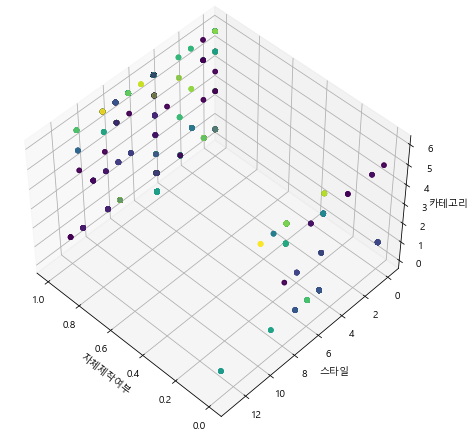

In [206]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import font_manager, rc
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name() # 폰트 적용
rc('font',family=font)

# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[1, 1, .95, 1], elev=48, azim=134)
ax.scatter(r['자체제작여부'],r['스타일'],r['카테고리'],c=r['predict'],alpha=0.5)
ax.set_xlabel('자체제작여부')
ax.set_ylabel('스타일')
ax.set_zlabel('카테고리')
plt.show()


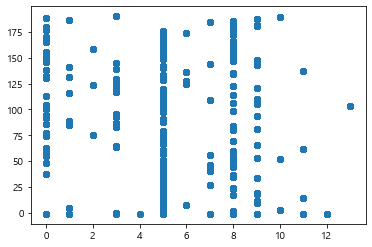

In [207]:
plt.scatter(r['스타일'],r['predict'])

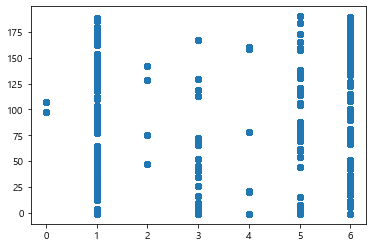

In [208]:
plt.scatter(r['카테고리'],r['predict'])

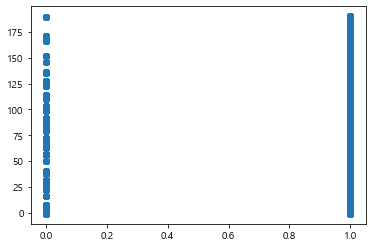

In [209]:
plt.scatter(r['자체제작여부'],r['predict'])